In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 799.4/799.4 kB 9.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [2]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.50 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Setup complete ✅ (12 CPUs, 83.5 GB RAM, 30.2/78.2 GB disk)


In [3]:
!pip install supervision

from IPython import display
display.clear_output()

import supervision as sv
print("supervision.__version__:", sv.__version__)

supervision.__version__: 0.21.0


In [4]:
from google.colab import drive

drive.mount('/content/drive')

from ultralytics import YOLO
import numpy as np

Mounted at /content/drive


In [5]:
MODEL = 'yolov8x.pt'

model = YOLO(MODEL)

model.fuse()

100%|██████████| 131M/131M [00:00<00:00, 214MB/s]


YOLOv8x summary (fused): 268 layers, 68200608 parameters, 0 gradients, 257.8 GFLOPs


In [6]:
SOURCE_VIDEO_PATH = '/content/drive/MyDrive/CV Course/DATA/YOLO OBJECT TRACKER/straight cars.mp4'

In [7]:
model.model.names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

In [8]:
CLASS_NAMES_DICT = model.model.names
selected_classes = [1,2,3,5,7]

In [9]:
generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
box_annotator = sv.BoxAnnotator(thickness=4, text_thickness=2, text_scale=1) # alters annotation on boxes
iterator = iter(generator)
frame = next(iterator)

results = model(frame)


0: 640x384 3 persons, 17 cars, 2 motorcycles, 2 buss, 140.8ms
Speed: 16.2ms preprocess, 140.8ms inference, 657.9ms postprocess per image at shape (1, 3, 640, 384)


In [10]:
detections = sv.Detections.from_ultralytics(results[0])
detections

Detections(xyxy=array([[     257.87,      1453.7,      527.18,      1860.8],
       [     705.16,      1443.5,      984.26,      1798.1],
       [     643.03,      1247.8,      812.33,      1440.6],
       [     348.79,      1270.9,      526.06,      1481.6],
       [     587.28,      944.16,      722.81,      1132.6],
       [    0.60292,      1308.7,      230.06,      1656.8],
       [     381.05,      1147.6,      516.27,      1288.8],
       [     268.74,      1050.9,      371.31,      1151.9],
       [     317.43,      986.39,      399.78,      1059.6],
       [      835.4,      1837.1,        1080,      1919.2],
       [     411.83,      1049.2,      516.46,      1159.8],
       [     544.63,      1177.4,      596.18,      1283.9],
       [     546.74,      1219.9,      593.61,      1310.2],
       [     1.1006,      1803.4,       90.78,      1919.1],
       [     460.58,      1007.8,      540.25,      1087.3],
       [     371.67,       921.9,      435.78,      982.96],
       [

In [11]:
detections = detections[np.isin(detections.class_id, selected_classes)]
detections

Detections(xyxy=array([[     257.87,      1453.7,      527.18,      1860.8],
       [     705.16,      1443.5,      984.26,      1798.1],
       [     643.03,      1247.8,      812.33,      1440.6],
       [     348.79,      1270.9,      526.06,      1481.6],
       [     587.28,      944.16,      722.81,      1132.6],
       [    0.60292,      1308.7,      230.06,      1656.8],
       [     381.05,      1147.6,      516.27,      1288.8],
       [     268.74,      1050.9,      371.31,      1151.9],
       [     317.43,      986.39,      399.78,      1059.6],
       [      835.4,      1837.1,        1080,      1919.2],
       [     411.83,      1049.2,      516.46,      1159.8],
       [     546.74,      1219.9,      593.61,      1310.2],
       [     1.1006,      1803.4,       90.78,      1919.1],
       [     460.58,      1007.8,      540.25,      1087.3],
       [     371.67,       921.9,      435.78,      982.96],
       [     143.28,      1131.3,      313.22,      1320.6],
       [

In [12]:
labels = [f'{CLASS_NAMES_DICT[class_id]} {confidence:0.2f}' for _,_, confidence, class_id,_,_ in detections]
labels

['car 0.95',
 'car 0.91',
 'car 0.90',
 'car 0.89',
 'bus 0.89',
 'car 0.87',
 'car 0.81',
 'car 0.80',
 'car 0.74',
 'car 0.74',
 'car 0.73',
 'motorcycle 0.70',
 'car 0.61',
 'car 0.60',
 'car 0.59',
 'car 0.54',
 'motorcycle 0.47',
 'car 0.36',
 'car 0.30',
 'bus 0.27',
 'car 0.27']

SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead


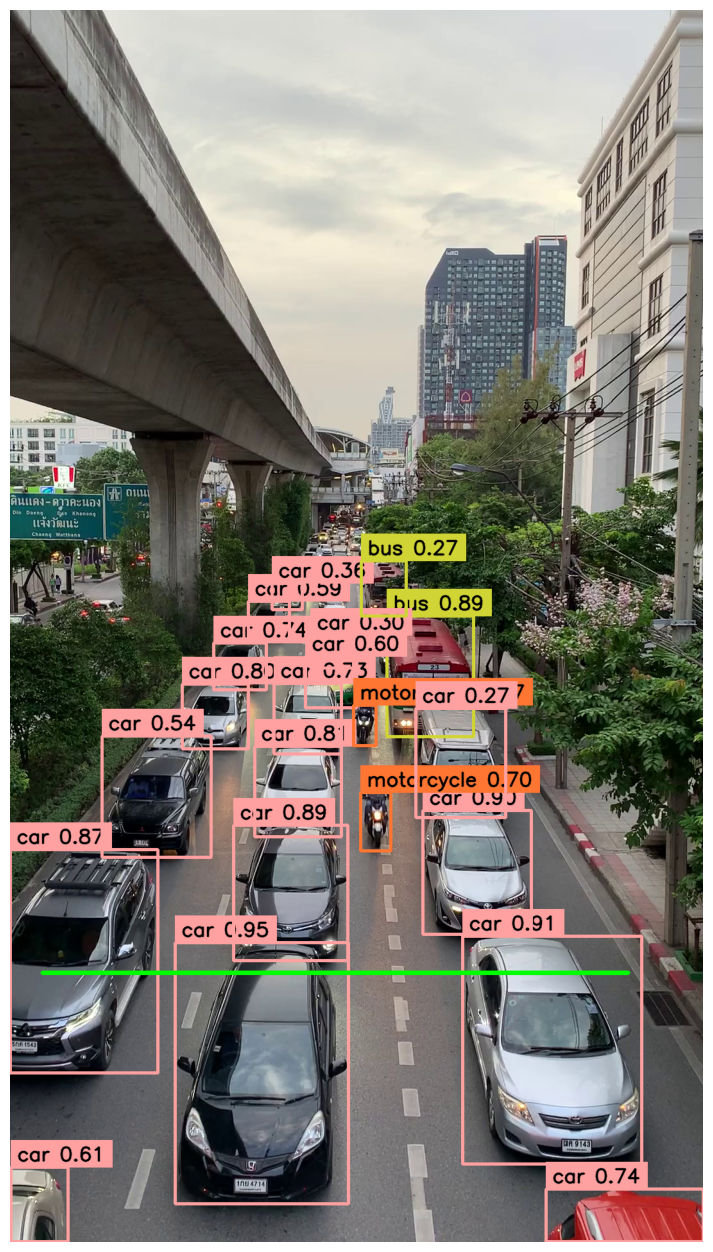

In [13]:
annotated_frame1 = box_annotator.annotate(scene = frame, detections=detections, labels=labels)
LINE_START = sv.Point(50,1500)
LINE_END = sv.Point(1013-50, 1500)

annotated_frame1 = sv.draw_line(scene=annotated_frame1, start = LINE_START, end = LINE_END, color = sv.Color.GREEN, thickness=5)
sv.plot_image(annotated_frame1, (16,16))

In [14]:
LINE_START = sv.Point(50, 1500)
LINE_END = sv.Point(969, 1500)
TARGET_VIDEO_PATH = f"/content/vehicle-counting-result-with-counter.mp4"

In [15]:
sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)

VideoInfo(width=1080, height=1920, fps=29, total_frames=507)

In [20]:
byte_tracker = sv.ByteTrack(track_thresh=0.25, track_buffer=30, match_thresh=0.8, frame_rate=29)
generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
line_zone = sv.LineZone(start=LINE_START, end=LINE_END)
box_annotator = sv.BoxAnnotator(thickness=4, text_thickness=2, text_scale=0.5)
trace_annotator = sv.TraceAnnotator(thickness=4, trace_length=50)
line_zone_annotator = sv.LineZoneAnnotator(thickness=4, text_thickness=2, text_scale=0.5)

def callback(frame: np.ndarray, index: int) -> np.ndarray:
  results = model(frame, verbose=False)[0]

  detections = sv.Detections.from_ultralytics(results)
  detections = detections[np.isin(detections.class_id, selected_classes)]

  detections = byte_tracker.update_with_detections(detections)

  labels = [f'{tracker_id} {CLASS_NAMES_DICT[class_id]} {confidence:0.2f}' for _,_,confidence,class_id,tracker_id,_ in detections]
  annotated_frame = trace_annotator.annotate(scene=frame.copy(), detections=detections)
  annotated_frame = box_annotator.annotate(scene=frame, detections=detections, labels=labels)
  line_zone.trigger(detections)
  return line_zone_annotator.annotate(annotated_frame, line_counter=line_zone)

sv.process_video(source_path=SOURCE_VIDEO_PATH, target_path=TARGET_VIDEO_PATH, callback=callback)

SupervisionWarnings: `track_buffer` in `ByteTrack.__init__` is deprecated and will be remove in `supervision-0.23.0`. Use 'lost_track_buffer' instead.
SupervisionWarnings: `track_thresh` in `ByteTrack.__init__` is deprecated and will be remove in `supervision-0.23.0`. Use 'track_activation_threshold' instead.
SupervisionWarnings: `match_thresh` in `ByteTrack.__init__` is deprecated and will be remove in `supervision-0.23.0`. Use 'minimum_matching_threshold' instead.
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead
Supe

In [ ]:
print("e")